<a href="https://colab.research.google.com/github/Pranithabatta/finger-print-detection/blob/main/finger_prints.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

patool: Extracting /content/drive/MyDrive/finger print images-20231003T034330Z-001.zip ...
patool: running /usr/bin/7z x -o./Unpack_9qchsajk -- "/content/drive/MyDrive/finger print images-20231003T034330Z-001.zip"
patool: ... /content/drive/MyDrive/finger print images-20231003T034330Z-001.zip extracted to `finger print images-20231003T034330Z-0019' (local file exists).


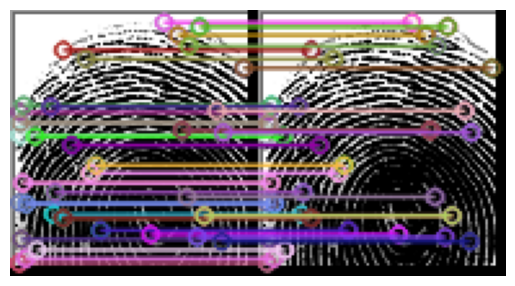

In [12]:

!pip install patool
import patoolib
patoolib.extract_archive('/content/drive/MyDrive/finger print images-20231003T034330Z-001.zip')


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os

from google.colab.patches import cv2_imshow


img=cv2.imread('/content/drive/MyDrive/finger print.jpg')
plt.imshow(img)
plt.axis("off")
best_score=0
best_img=None
best_kp1=None
best_kp2=None
best_mp=None
best_img=None




img1=cv2.imread('/content/1__M_Right_middle_finger.BMP')
for img in [img for img in os.listdir('/content/finger print images')][0:1000]:
  # target_img=cv2.imread('/content/finger print images'+img)
  target_img_path = os.path.join('/content/finger print images', img)
  target_img = cv2.imread(target_img_path)
  sift=cv2.SIFT_create()
  key1,des1=sift.detectAndCompute(img1,None)
  key2,des2=sift.detectAndCompute(target_img,None)
  matcher=cv2.FlannBasedMatcher({'algorithm':1,'trees':10})
  matches=matcher.knnMatch(des1,des2,k=2)
  match_points=[]
  for p,q in matches:
    if p.distance <0.1*(q.distance):
      match_points.append(p)
  keypoints=min(len(key1),len(key2))
  score=len(match_points)/keypoints*100
  if best_score<score:
    best_score=score
    best_kp1=key1
    best_kp2=key2
    best_mp=match_points
    best_img=target_img
result_img=cv2.drawMatches(img1,best_kp1,best_img,best_kp2,best_mp,None)
image = cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB)
plt.imshow(image)